### violinplotでobject arrays are not supportedのエラーが出てしまう。

[参考URL](https://stackoverflow.com/questions/52284034/categorical-plotting-with-seaborn-raises-valueerror-object-arrays-are-not-suppo)

間違いの例

In [2]:
import pandas as pd
import seaborn as sbs
import random 
import matplotlib.pyplot as plt

column_names = ["x","y"]
random_set = ['A','B']
df = pd.DataFrame(columns = column_names)

# not the better way of creating a DF, but possible
for i in range(100):
  d_util = {"x" : random.choice(random_set),
            "y" : random.randint(1,100)}
  df = df.append(d_util, ignore_index = True)
df

/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_67542/1863251601.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d_util, ignore_index = True)
/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_67542/1863251601.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d_util, ignore_index = True)
/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_67542/1863251601.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d_util, ignore_index = True)
/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_67542/1863251601.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

,x,y
0,B,18
1,B,29
2,B,7
3,B,86
4,B,70
...,...,...
95,A,55
96,B,20
97,A,55
98,A,89


In [3]:
# See the types...
print("Original Types: ",df.dtypes)


#this not
sbs.violinplot(x='x', y='y', data=df)

Original Types:  x    object
y    object
dtype: object


ValueError: object arrays are not supported

The next example, creating the Data Frames with correct types, also works.

In [18]:
# Another option when creating the dataframe 

import pandas as pd
import seaborn as sbs
import random 
import matplotlib.pyplot as plt


random_set = ['A','B']

dfw = pd.DataFrame({'x' : pd.Series(dtype='str'),
                   'y' : pd.Series(dtype='int')})


for i in range(100):
  d_util = {"x" : random.choice(random_set),
            "y" : random.randint(1,100)}
  dfw = dfw.append(d_util, ignore_index = True)


/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_57452/3992203747.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfw = dfw.append(d_util, ignore_index = True)
/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_57452/3992203747.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfw = dfw.append(d_util, ignore_index = True)
/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_57452/3992203747.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfw = dfw.append(d_util, ignore_index = True)
/var/folders/bd/v4w6mc2x7l9_l61ch4s60y9m0000gn/T/ipykernel_57452/3992203747.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

Original Types:  x    object
y     int64
dtype: object


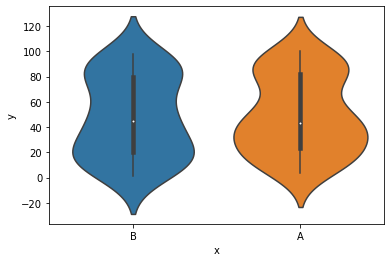

In [19]:
print("Original Types: ",dfw.dtypes)

x = sbs.violinplot(x='x', y='y', data=dfw)

yの値がobject型だとエラーが出てしまうことがわかった。→値に合わせたデータ型を用意する必要あり